# NDLSLM_0.8B-Chat-LORA

In [24]:
from peft import PeftModel  # dynamic import to avoid dependency on peft
from tqdm import tqdm 
import torch 
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
)
from modelscope import AutoModelForCausalLM, AutoTokenizer
model_name = "Ndlcwx/NDLSLM_0.8B-Chat"
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    trust_remote_code=True,
)
from modelscope import GenerationConfig
model = AutoModelForCausalLM.from_pretrained(model_name,device_map="auto", trust_remote_code=True)
model.generation_config = GenerationConfig.from_pretrained(model_name, trust_remote_code=True,temperature = 0.01,top_k=3)
# model.resize_token_embeddings(len(tokenizer))
model = PeftModel.from_pretrained(model,'/root/autodl-tmp/my_lora/model_save/lora_ner3/checkpoint-240')
print("Loaded PEFT model. Merging...")
model.merge_and_unload()
print("Merge complete.")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


正在使用flash_attn的RMS
Loaded PEFT model. Merging...
Merge complete.


In [25]:
from transformers import GenerationConfig
gen_config = GenerationConfig(
    temperature=0.7,
    top_k=30,
    top_p=0.5,
    do_sample=True,
    num_beams=1,
    repetition_penalty=1.3,
    max_new_tokens=400,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
)
prompt= '请介绍一下李白?'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


李白的《将进酒》是一首豪放不羁的诗歌，作者是唐代诗人白居易。这首诗描绘了杜甫在登高时对人生、爱情和人生的思考，表达了他对生命的热爱和对自由的精神追求。同时，也反映了当时社会阶层差异和人性的复杂性。整篇诗歌以“君不见黄河之水天上来”为开头，表现了人们对生命的向往与执着，同时也展现了苏轼对于人类命运的无奈和不屈精神。


In [27]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= instruction+'苹果公司的主营业务是什么?'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


文本理解，公司名称：iPhone，关键词：核心业务


In [28]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '苹果公司的主营业务是什么?'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


Apple公司主营电子产品、计算机硬件和软件等。


In [29]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '腾讯公司的主营业务都有哪些？'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


腾讯公司成立于1998年，是一家总部位于中国深圳的互联网公司。该公司主要提供互联网服务、云计算服务和移动应用开发等业务。目前，阿里巴巴集团旗下拥有多个子公司和分支机构，包括淘宝网、天猫商城等。其中，京东集团是中国最大的电子商务公司之一，旗下有顺丰速运、菜鸟网络等多家平台；苏宁易购则是一家以零售为主的公司，主营电子产品销售和服务业务。此外，腾讯公司还涉足金融领域，如支付宝、微信支付等品牌也主要经营互联网金融产品和服务。


In [55]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= instruction+'华瑞电器股份有限公司获得多少项国内专利？其中有多上项发明专利？'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


文本理解，公司名称：华瑞电器有限责任公司，关键词：已提交专利申请


In [57]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '华瑞电器股份有限公司获得多少项国内专利？其中有多上项发明专利？'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


华瑞电气有限责任公司是一家中国著名的电力企业，成立于1998年。该公司主要从事电力系统、发电机和配电设备的设计和销售工作，致力于为客户提供高品质的产品和服务。因此，该公司获得了多个奖项的荣誉，包括2005年度全国优秀优秀企业奖等荣誉。
根据2019年的数据，华瑞电气股份公司位列全球第一，其子公司为北京电力公司（股票代码：601110）。该公司的主营业务是发电，并推广了其他类型的能源项目，如太阳能、风能等。此外，公司还涉足了许多其他的领域，例如新能源技术、环保技术等。
综上所述，华瑞机电集团公司荣膺多项国际先进企业的殊荣，并在业内享有盛誉。


In [61]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '你可以帮我提出三点保持健康的建议吗？'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


当然可以！以下是一些关于如何维持健康的建议： 
1. 均衡饮食: 摄入足够的蛋白质、碳水化合物和脂肪，避免高热量和高糖分的食物。同时减少盐的摄入量，如油炸食品、糖果等。 
2. 多喝水: 每天至少喝八杯水或8盎司的水（约6升）。多饮水有助于促进新陈代谢并减轻压力。此外，注意补充水分可以帮助身体恢复。 
3. 定期体检: 如果发现任何健康问题，及时就医以获取必要的治疗。这包括接种疫苗、进行常规检查以及预防接种等等。 
4. 控制体重: 在减肥期间要控制自己的体重以保持身体健康。不要过度减重，以免影响健康和健康状况。 
5. 睡眠充足: 与朋友和家人一起睡觉可以提高身体的免疫力和抵抗力。每晚7-9小时的睡眠时间对身心健康非常重要。 
希望这些建议能对你有所帮助！


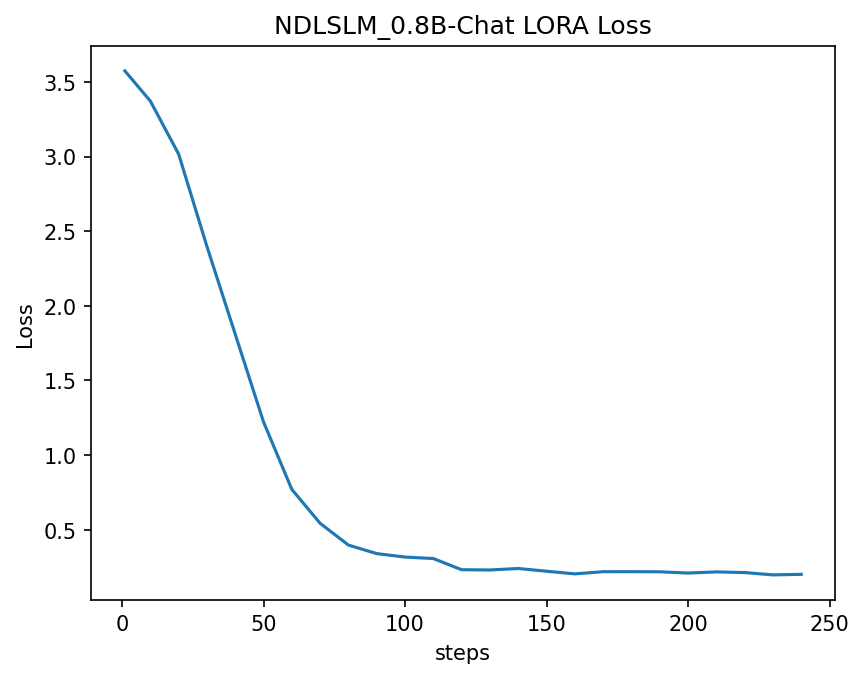

In [16]:
#保存损失函数图
import ujson
with open('/root/autodl-tmp/my_lora/model_save/lora_ner/checkpoint-240/trainer_state.json','r') as file:
    data = ujson.load(file)
loss_ = data['log_history']
loss_lst = []
step_lst = []
for i in range(len(loss_)):
    loss_lst.append(loss_[i]['loss'])
    step_lst.append(loss_[i]['step'])
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(step_lst,loss_lst)
plt.ylabel('Loss')
plt.xlabel('steps')
plt.title('NDLSLM_0.8B-Chat LORA Loss')
plt.savefig('lora_0.8B.png')
plt.show()


# NDLMoe_1.3B-Chat Lora

In [30]:
from peft import PeftModel  # dynamic import to avoid dependency on peft
from tqdm import tqdm 
import torch 
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
)
from modelscope import AutoModelForCausalLM, AutoTokenizer
model_name = "Ndlcwx/NDLMoe_1.3B-Chat"
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    trust_remote_code=True,
)
from modelscope import GenerationConfig
model = AutoModelForCausalLM.from_pretrained(model_name,device_map="auto", trust_remote_code=True)
model.generation_config = GenerationConfig.from_pretrained(model_name, trust_remote_code=True,temperature = 0.01,top_k=3)
# model.resize_token_embeddings(len(tokenizer))
model = PeftModel.from_pretrained(model,'/root/autodl-tmp/my_lora/model_save/lora_ner_moe/checkpoint-240')
print("Loaded PEFT model. Merging...")
model.merge_and_unload()
print("Merge complete.")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


正在使用flash_attn的RMS
Loaded PEFT model. Merging...
Merge complete.


In [83]:
from transformers import GenerationConfig
gen_config = GenerationConfig(
    temperature=0.01,
    top_k=3,
    top_p=0.5,
    do_sample=True,
    num_beams=1,
    repetition_penalty=1.3,
    max_new_tokens=100,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
)
prompt= '请介绍一下诗人李白'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


诗歌创作，是中国古代文学的代表之一。其诗作以山水、人物为主旨，表现了作者对自然的热爱和追求。其中，《将进酒》是一首抒情散文，描写了主人公在人生旅途中所经历的各种情感与感受。《将进酒》是唐代著名文学家杜甫所作的一篇诗集，被誉为“诗词之冠”。这首诗以其优美的语言风格而闻名于世，被誉为中国古典小说的巅峰之作。 
《将进酒》是一部具有深刻思想


In [88]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= instruction+'湖南长远锂科股份有限公司变更设立时作为发起人的法人有哪些？'
response = model.chat(tokenizer,query=prompt,max_window_size=100,gen_config=gen_config)
print(response)


公司名称：集团公司（简称“公司”）
经营范围： 开发、销售及销售各种电子产品，包括电脑、手机等。
法定代表人：（姓名）
法定代表人：（签名）：XXX
地址：[联系方式]
联系电话：(邮箱)：XX-XXXXXXX
联系人：（邮箱地址）：XX-XXXXXXX
电话：（电子邮箱）：XX-XXXXXXX
电子邮件：（邮件号码）：XX-XXXXXXX
公司名称：“集团”名称及全称：有限责任公司（以下简称“股份公司”），企业名称：


In [89]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '苹果公司的主营业务是什么?'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


苹果公司（Apple Inc.）是一家总部位于美国加利福尼亚州的科技公司，成立于1998年。该公司致力于开发智能手表、智能家居设备以及数字娱乐产品等高科技产品和服务。公司主要从事智能手机和平板电脑的研发和销售，旗下拥有多个品牌和产品系列。
苹果公司专注于研发创新科技产品和解决方案，包括iPhone手机、iPad笔记本电脑、Mac电脑等产品。其中，iPhone电视是苹果公司首款采用人工智能技术的电视机；iPad笔记本则是谷歌旗下的在线音乐播放器；AirPods是一款基于虚拟现实技术的产品，具有强大的用户体验


In [90]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= '腾讯公司的主营业务都有哪些？'
response = model.chat(tokenizer,query=prompt,gen_config=gen_config)
print(response)


腾讯公司，简称微信，是一家专注于互联网技术的科技公司。公司成立于2010年，总部位于中国北京市海淀区中关村科技园内，是一家以云计算、人工智能和大数据为核心的互联网公司。
腾讯公司在互联网技术领域拥有多年的经验和技术积累，致力于为客户提供更加便捷的服务和产品体验。目前，字节跳动是全球最大的游戏直播平台之一，其移动游戏业务已经取得了巨大的成功。同时，快手也积极拓展海外市场，推出了一系列具有前瞻性的产品和服务，如短视频内容制作等。此外，B站还涉足游戏开发等领域，不断推陈出新


In [95]:
instruction= '你是一个NER助手\n'
# system='You are a helpful assistant.'+instruction
prompt= instruction+'云南沃森生物技术股份有限公司负责产品研发的是什么部门？'
response = model.chat(tokenizer,query=prompt,max_window_size=50,gen_config=gen_config)
print(response)


公司名称：科技（XYZ）
公司简介：
本公司是一家专注于研发、生产和销售生物医药产品的科技公司，致力于为客户提供高品质的产品和服务。公司拥有一支高素质的研发团队，拥有多年的研发和制造经验，能够为用户提供高质量的产品解决方案和服务。
产品类别：医疗器械类
产品线：药品制剂系列
产品销售范围：医药类产品销售
销售渠道：电商平台商城
服务内容：在线预约挂号、电话咨询等增值服务
客户评价：
我们公司的产品和服务涵盖了多个领域，包括新药研究、临床试验


In [23]:
# print(model)